![ZM](ZM.png)

In [1]:
## importing libaries
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
from pandas import Series
import seaborn as sns
from scipy.stats import binom
from scipy.stats import poisson
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn import metrics
import plotly.express as px

In [3]:
# for Ingoring Warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Reading The Data

In [4]:
df = pd.read_csv(r"C:\Users\TA\Desktop\TA\datasets\zomato.csv")

In [5]:
df.head() ### for displaying first 5 rows

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [6]:
df.columns ### Displaying Columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## Get Info of Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.describe() ## describing given data

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

Basic statistic details of the dataset is shown using the describe() function-ONLY NUMERICAL VARIABLES displayed

## EXPLORATORY DATA ANALYSIS

In [9]:
## MISSING VALUES

In [10]:
# 1. FINDING MISSING VALUES USING FUNCTIONS
df.isnull().sum() ## Checking null Values/finding missing values in our dataset

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Displays all the null values in every column- 'Cuisines' column has 9 missing values hence, feature engineering has to be performed on that column

In [11]:
#2. FINDING MISSING VALUES USING QUERY
for columns in df.columns:
    if df[columns].isnull().sum() > 0:
        print(columns)

Cuisines


In [12]:
#finding missing values using a simple query
[features for features in df.columns if df[features].isnull().sum() >0]

['Cuisines']

## MERGING 2 FILES

In [13]:
#loading excel file using the pd.read_excel function from PANDAS


In [14]:
df_country = pd.read_excel(r"C:\Users\TA\Desktop\TA\datasets\Country-Code z.xlsx")
df_country.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

Our csv file has 2 columns-'Country Code' and 'Country - As you can recall, we have the 'Country Code' column in our CSV file, so let us combine this excel file and our dataset(csv file) using the pandas merge function on this column

In [15]:
#merge function to merge both CSV and XSL files
#displaying our final dataset

final_df = pd.merge(df, df_country, on = "Country Code", how = "left")
final_df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

Our final dataset has the 'Country' column added at the end of our new dataset(which is the additonal column) that has been added from excel to our dataset. Creating the final dataset

## DISPLAYING THE DATATYPES OF FINAL DATASET

In [16]:
#checking data types of our final dataset

final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

## FEATURE SELECTION

Our final dataset has many features , let us a pick a few features & draw insights from our dataset

1. TOP 3 CONTRIES WITH MAXIMUM NUMBER OF ORDERS

In [17]:
country_name = final_df.Country.value_counts().index
country_name

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [18]:
country_value = final_df.Country.value_counts().values
country_value

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

In [19]:
## PIE CHART VISUALIZATION

import plotly.graph_objects as go

labels = country_name
values = country_value

fig = go.Figure(data=[go.Pie(labels=labels[:5], values=values[:5])])
fig.show()

# 2. COUNTRY WITH MOST RATINGS

In [20]:
#displaying the ratings related columns in a dataframe format

final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()

Aggregate rating Rating color Rating text     0
0                0.0        White   Not rated  2148
1                1.8          Red        Poor     1
2                1.9          Red        Poor     2
3                2.0          Red        Poor     7
4                2.1          Red        Poor    15
5                2.2          Red        Poor    27
6                2.3          Red        Poor    47
7                2.4          Red        Poor    87
8                2.5       Orange     Average   110
9                2.6       Orange     Average   191
10               2.7       Orange     Average   250
11               2.8       Orange     Average   315
12               2.9       Orange     Average   381
13               3.0       Orange     Average   468
14               3.1       Orange     Average   519
15               3.2       Orange     Average   522
16               3.3       Orange     Average   483
17               3.4       Orange     Average   498
18               3.5       Yellow        Good   480
19               3.6       Yellow        Good   458
20               3.7       Yellow        Good   427
21               3.8       Yellow        Good   400
22               3.9       Yellow        Good   335
23               4.0        Green   Very Good   266
24               4.1        Green   Very Good   274
25               4.2        Green   Very Good   221
26               4.3        Green   Very Good   174
27               4.4        Green   Very Good   144
28               4.5   Dark Green   Excellent    95
29               4.6   Dark Green   Excellent    78
30               4.7   Dark Green   Excellent    42
31               4.8   Dark Green   Excellent    25
32               4.9   Dark Green   Excellent    61

In [21]:
#renaming the 0  column to rating count for readability (storing it as a dataset)

ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

In [22]:
#displaying first five records in the ratings dataset

ratings.head()

Aggregate rating Rating color Rating text  Rating Count
0               0.0        White   Not rated          2148
1               1.8          Red        Poor             1
2               1.9          Red        Poor             2
3               2.0          Red        Poor             7
4               2.1          Red        Poor            15

BAR CHART VISUALIZATION

Text(0.5, 1.0, 'User Ratings')

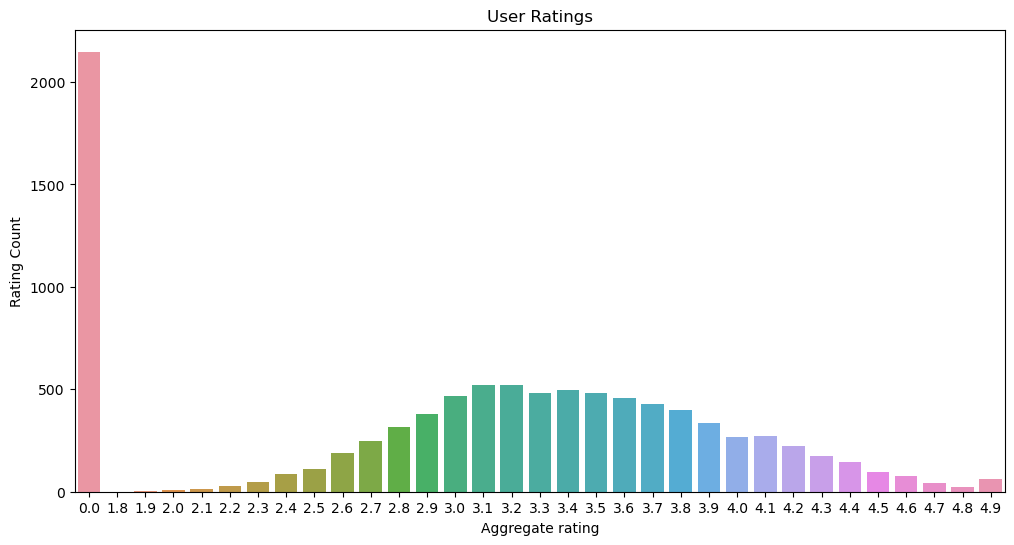

In [23]:
#bar plot visualization

plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=ratings)
plt.title('User Ratings')

In [24]:
fig = px.histogram(final_df, "Rating color")
fig.show()

<AxesSubplot:xlabel='Rating color', ylabel='count'>

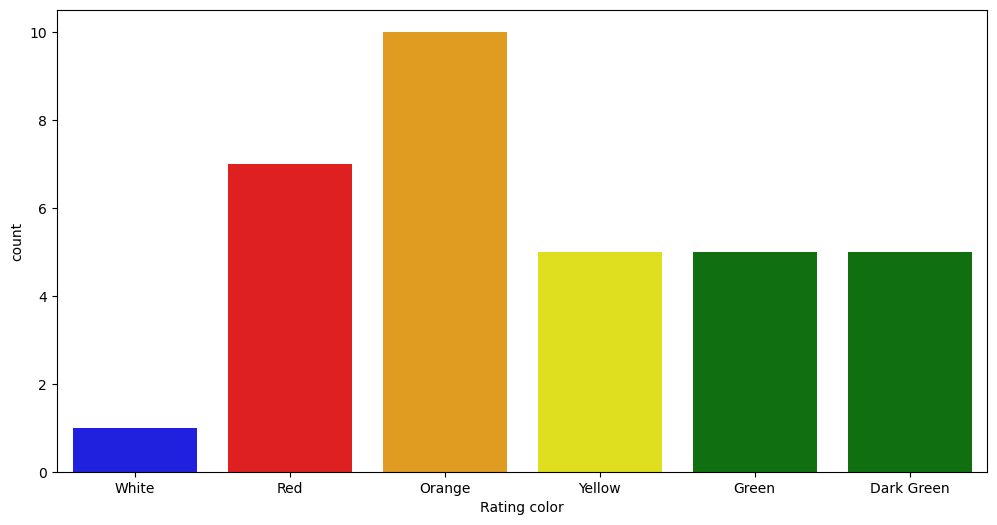

In [25]:
#countplot to count the total rating based on color

sns.countplot(x='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [26]:
fig = px.bar(ratings, x = "Aggregate rating", y = "Rating Count",
            color = "Rating color")
fig.show()

Text(0.5, 1.0, 'User Ratings')

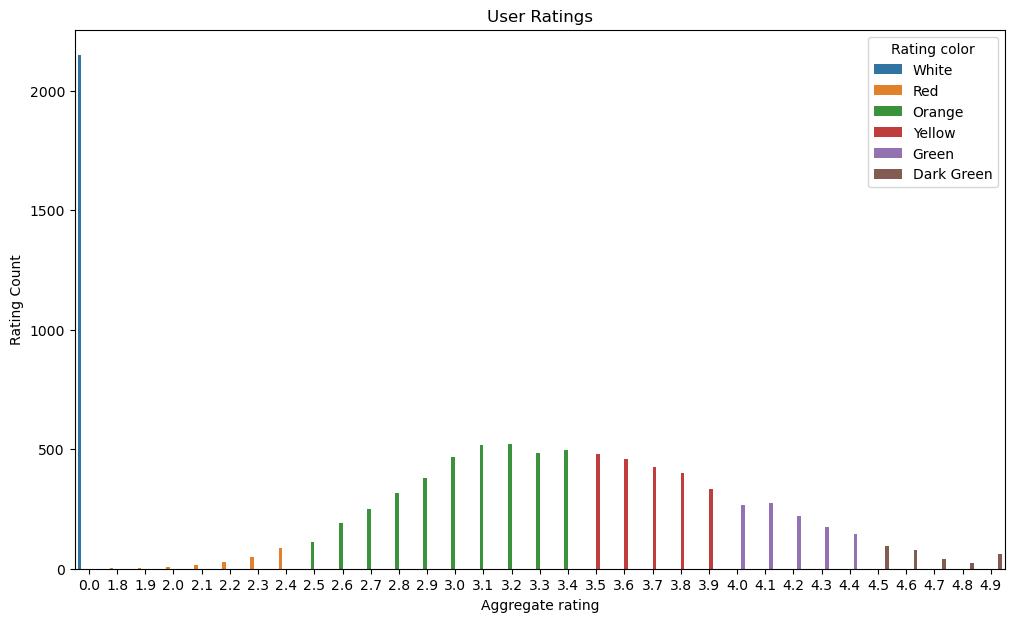

In [27]:
#observing the same  bar plot in the rating colors


plt.rcParams['figure.figsize'] = (12,7)
sns.barplot(x='Aggregate rating',y='Rating Count',hue = 'Rating color',data=ratings)
plt.title('User Ratings')

Colors are right but have been mapped wrong. Hence have to map them to the right ratings

Text(0.5, 1.0, 'User Ratings')

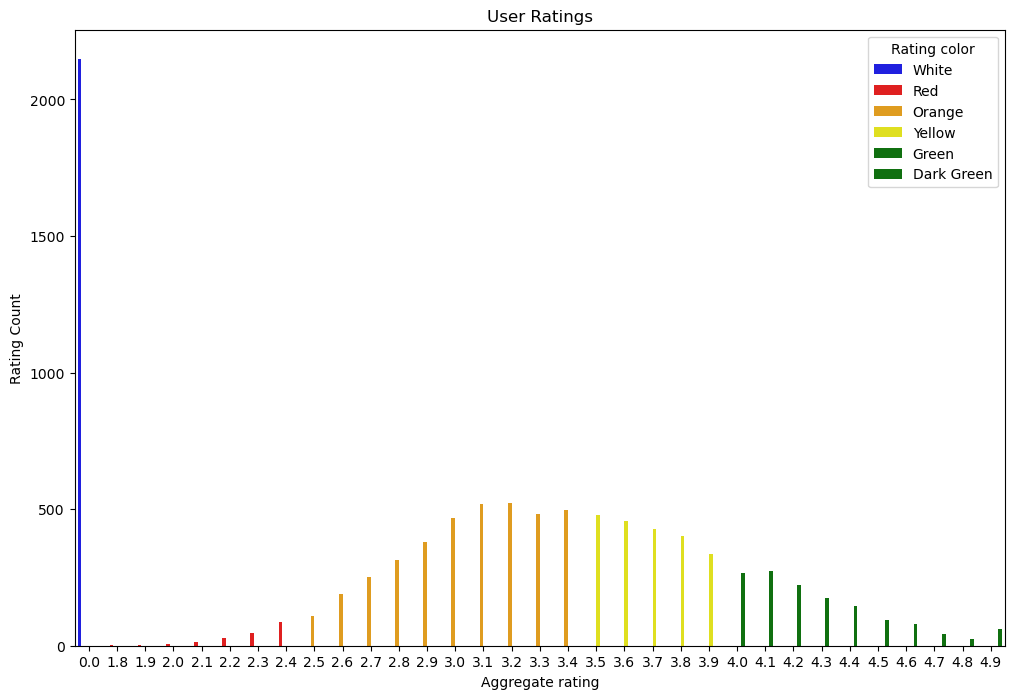

In [28]:
#observing the same bar plot in the rating colors


plt.rcParams['figure.figsize'] = (12,8)
sns.barplot(x='Aggregate rating',y='Rating Count',hue = 'Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])
plt.title('User Ratings')

 4. COUNTRIES WITH ZERO RATINGS

In [29]:
#finding the names of the countries that has given zero rating

final_df.loc[final_df["Aggregate rating"] == 0].groupby("Country").size().reset_index().rename(columns = {
    0:"Not Rated"
}).sort_values(by = "Not Rated")

Country  Not Rated
2  United Kingdom          1
3   United States          3
0          Brazil          5
1           India       2139

INFERENCE--> Out of 2148 records , there are 2139 zero ratings which is from India(being the maximum)

5. CURRENCY USED IN EACH COUNTRY

In [30]:
#finding which currency is used in which country

final_df[["Currency", "Country"]].groupby("Country").first()

Currency
Country                               
Australia                    Dollar($)
Brazil              Brazilian Real(R$)
Canada                       Dollar($)
India               Indian Rupees(Rs.)
Indonesia       Indonesian Rupiah(IDR)
New Zealand              NewZealand($)
Phillipines           Botswana Pula(P)
Qatar                  Qatari Rial(QR)
Singapore                    Dollar($)
South Africa                   Rand(R)
Sri Lanka        Sri Lankan Rupee(LKR)
Turkey                Turkish Lira(TL)
UAE                 Emirati Diram(AED)
United Kingdom              Pounds(Œ£)
United States                Dollar($)

6. COUNTRIES THAT DO NOT HAVE ONLINE DELIVERY OPTION

In [31]:
#finding the countries that have online delivery


final_df[["Has Online delivery", "Country"]].groupby(["Has Online delivery", "Country"]).size().reset_index()

Has Online delivery         Country     0
0                   No       Australia    24
1                   No          Brazil    60
2                   No          Canada     4
3                   No           India  6229
4                   No       Indonesia    21
5                   No     New Zealand    40
6                   No     Phillipines    22
7                   No           Qatar    20
8                   No       Singapore    20
9                   No    South Africa    60
10                  No       Sri Lanka    20
11                  No          Turkey    34
12                  No             UAE    32
13                  No  United Kingdom    80
14                  No   United States   434
15                 Yes           India  2423
16                 Yes             UAE    28

In [32]:
final_df.loc[final_df["Has Online delivery"]=="Yes", "Country"].unique()

array(['UAE', 'India'], dtype=object)

INFERENCE --> Online deliveries are available in both India and UAE

7. CITY DISTRIBUTION OF TOP 5 CITIES

In [33]:
city_name = final_df.City.value_counts().index
city_value = final_df.City.value_counts().values

In [34]:
#pie chart for cities distribution - displaying the top 5 cities

import plotly.graph_objects as go

labels = country_name
values = country_value

fig = go.Figure(data=[go.Pie(labels=city_name[:5], values=city_value[:5])])
fig.show()


INFERENCE - Maximum transactions happen in New Delhi of India

8. TOP 10 CUISINES

In [35]:
final_df.Cuisines.value_counts()[:10]

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

([<matplotlib.patches.Wedge at 0x23fd907a0d0>,
 [Text(0.7383739846958008, 0.8153550507137645, 'North Indian'),
  Text(-0.5794679314239953, 0.9349956772366362, 'North Indian, Chinese'),
  Text(-1.067309479615702, 0.26617752482593154, 'Chinese'),
  Text(-1.0185984499802057, -0.4152796620326146, 'Fast Food'),
  Text(-0.5935788454809928, -0.9261015895664211, 'North Indian, Mughlai'),
  Text(-0.005887079599915552, -1.0999842463843672, 'Cafe'),
  Text(0.4842062514572988, -0.9876964645323336, 'Bakery'),
  Text(0.808736477166136, -0.7456174022251013, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375294202338, -0.44597564611473206, 'Bakery, Desserts'),
  Text(1.090298995560443, -0.14576728123927227, 'Street Food')],
 [Text(0.4027494461977095, 0.4447391185711442, '26.58%'),
  Text(-0.316073417140361, 0.5099976421290743, '14.51%'),
  Text(-0.5821688070631101, 0.14518774081414446, '10.05%'),
  Text(-0.5555991545346576, -0.22651617929051704, '10.05%'),
  Text(-0.32377027935326874, -0.505146321581

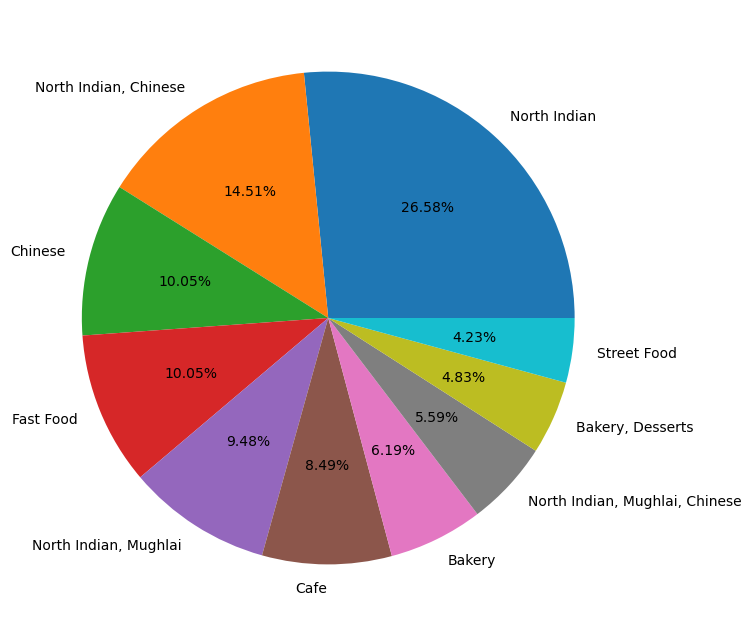

In [36]:
#pie chart to display the top 10 cuisines

cuisine_val = final_df.Cuisines.value_counts()              #values
cuisine_label = final_df.Cuisines.value_counts().index      #labels

plt.pie(x = cuisine_val[:10],labels = cuisine_label[:10],autopct='%1.2f%%')

Most ordered cuisine is North Indian

## Problems
1)You are in the team incharge of developing the interface for the food app. you are tasked with creating something that enables #user to choose the category of the food. you have no idea what categories to use while designing the app. how can this dataset #help you solve this issue?

2)You are hearing rumors that people in India passionately dislike the restaurants offered in the app. find out whether this #rumor has any substance to it.

3)You are one of the developer working in the food app company. you decide to quit and follow your dreams of opening a restaurant. using this data how will you go about increasing your chances of succeding in this highly competitive business?

we know that cuisines column has 9 values missing. as the number is not significant we can deal with it later.

Step:

    1)Missing Values
    
    2)Explore about the numerical variables
    
    3)explore about categorical variables
    
    4)Finding relationship between features.

Number of unique cuisines offered?
soln: we can use the cusinies column and extract all unique values from it using a simple python script

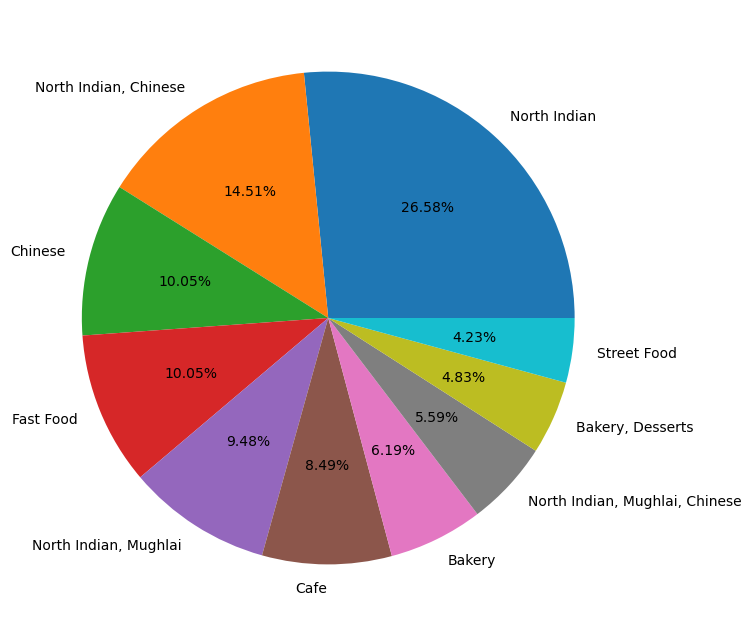

In [37]:
#pie chart to display the top 10 cuisines

cuisine_val = final_df.Cuisines.value_counts()              #values
cuisine_label = final_df.Cuisines.value_counts().index      #labels

plt.pie(x = cuisine_val[:10],labels = cuisine_label[:10],autopct='%1.2f%%')
plt.show()

In [38]:
df['Cuisines'].unique

<bound method Series.unique of 0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object>

In [39]:
from pprint import pprint

In [40]:
cuisines_total = df['Cuisines']
texts = []
hash_map = set()
cuisines_total.dropna(inplace=True)
for i in cuisines_total:
    for j in str(i).split(', '):
        if j not in hash_map:
            texts.append(j.lower())
            hash_map.add(j)
pprint(texts)

['french',
 'japanese',
 'desserts',
 'seafood',
 'asian',
 'filipino',
 'indian',
 'sushi',
 'korean',
 'chinese',
 'european',
 'mexican',
 'american',
 'ice cream',
 'cafe',
 'italian',
 'pizza',
 'bakery',
 'mediterranean',
 'fast food',
 'brazilian',
 'arabian',
 'bar food',
 'grill',
 'international',
 'peruvian',
 'latin american',
 'burger',
 'juices',
 'healthy food',
 'beverages',
 'lebanese',
 'sandwich',
 'steak',
 'bbq',
 'gourmet fast food',
 'mineira',
 'north eastern',
 'coffee and tea',
 'vegetarian',
 'tapas',
 'breakfast',
 'diner',
 'southern',
 'southwestern',
 'spanish',
 'argentine',
 'caribbean',
 'german',
 'vietnamese',
 'thai',
 'modern australian',
 'teriyaki',
 'cajun',
 'canadian',
 'tex-mex',
 'middle eastern',
 'greek',
 'bubble tea',
 'tea',
 'australian',
 'fusion',
 'cuban',
 'hawaiian',
 'salad',
 'irish',
 'new american',
 'soul food',
 'turkish',
 'pub food',
 'persian',
 'continental',
 'singaporean',
 'malay',
 'cantonese',
 'dim sum',
 'western'

## Conclusion
North Indian Dish is most Ordered Cuisine.

# let's see how ratings are distributed?
if people are passionately disliking the restaurants on the app there is a good chance they will leave a negative rating. therefore let's see how well the restaurants are faring based on ratings.

First we need to filter out ratings outside of India and separate the columns representing ratings. The country code of India is given to be 1.

In [41]:
ratings1 = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings1

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

In [42]:
from numpy import median

[]

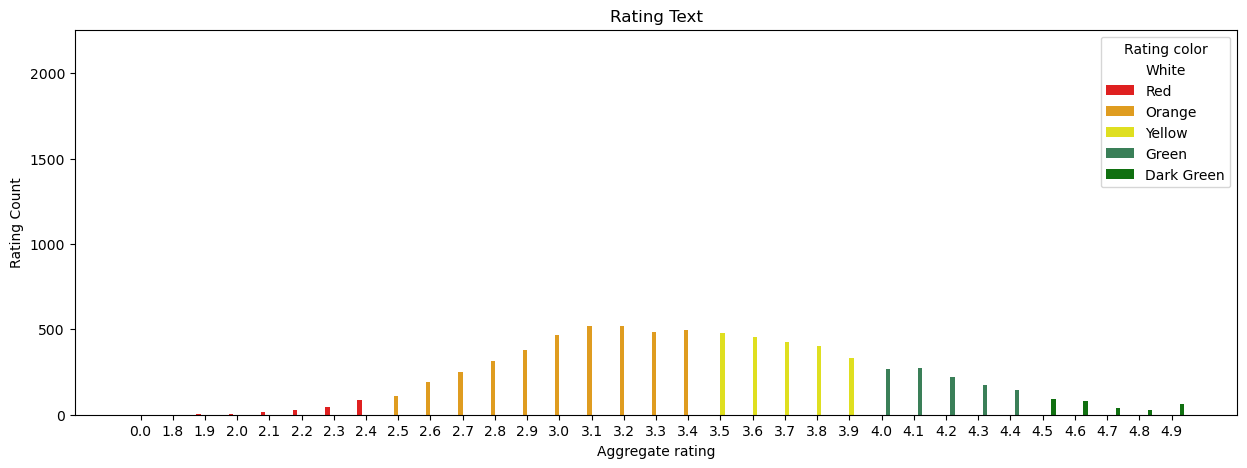

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x=ratings1['Aggregate rating'],y=ratings1['Rating Count'],hue=ratings1['Rating color'],estimator=median,palette=['white','red','orange','yellow','seagreen','green'])
plt.title('Rating Text')
plt.plot()

In [44]:
# Let's calculate the mean and standard deviation of the data in order to explain it better.

In [45]:
meanrat = ratings1['Aggregate rating'].mean()
stdrat = ratings1['Aggregate rating'].std()
print("Mean rating : ",meanrat, stdrat)


Mean rating :  3.2484848484848485 1.092051169852291


the mean rating is around 3.24 Points and standard deviation is 1.09 Points.

In [46]:
# Pie ploting the data

temp = ratings1[['Rating text', 'Rating Count']].groupby(['Rating text']).sum()
temp.drop('Not rated', axis=0, inplace=True)

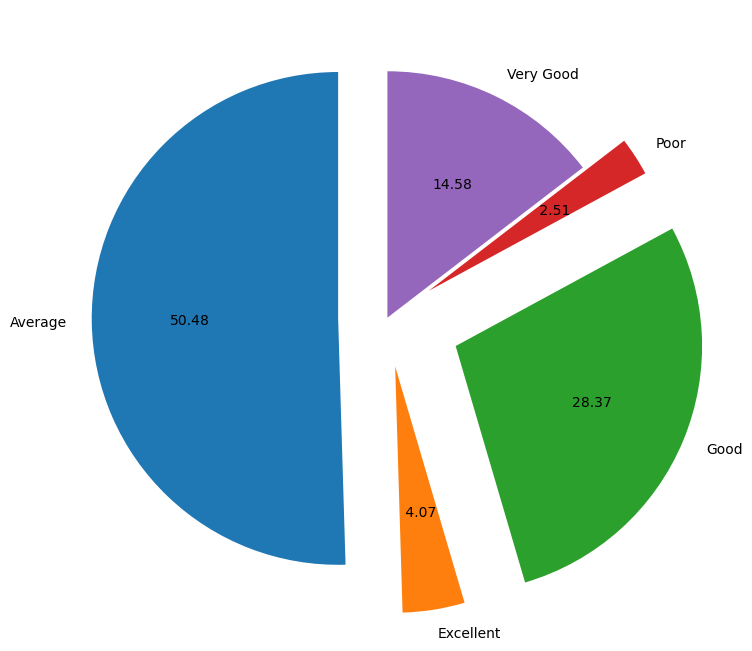

In [47]:
plt.figure(figsize=(12,8))
plt.pie(temp['Rating Count'], labels = ['Average', 'Excellent', 'Good', 'Poor', 'Very Good'], startangle=90,explode=(0.2,0.2,0.3,0.2,0),autopct='%5.2f')
plt.show()

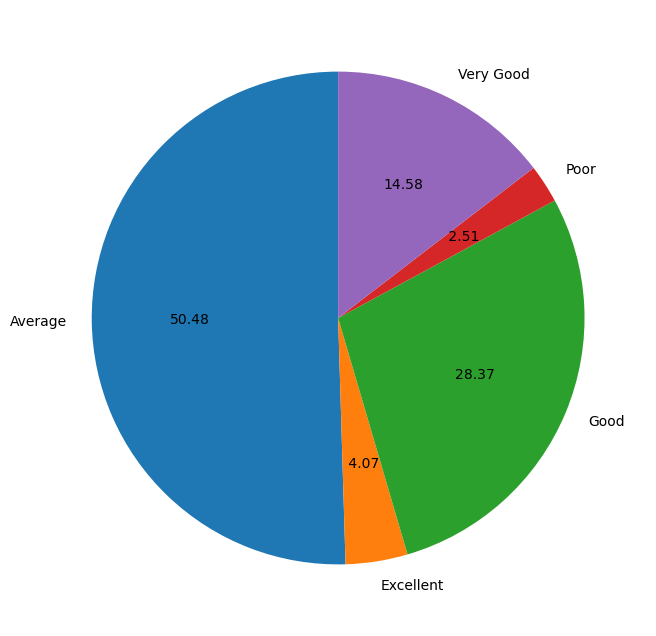

In [48]:
plt.figure(figsize=(12,8))
plt.pie(temp['Rating Count'], 
        labels = ['Average', 'Excellent', 'Good', 'Poor', 'Very Good'], 
        startangle=90,
        #explode=(0.2,0.2,0.3,0.2,0),
        autopct='%5.2f')
plt.show()

In [49]:
# importing Libaries
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [50]:
X1=df[['Aggregate rating']]
Y1=df[['Votes']]

KMeans(n_clusters=3)


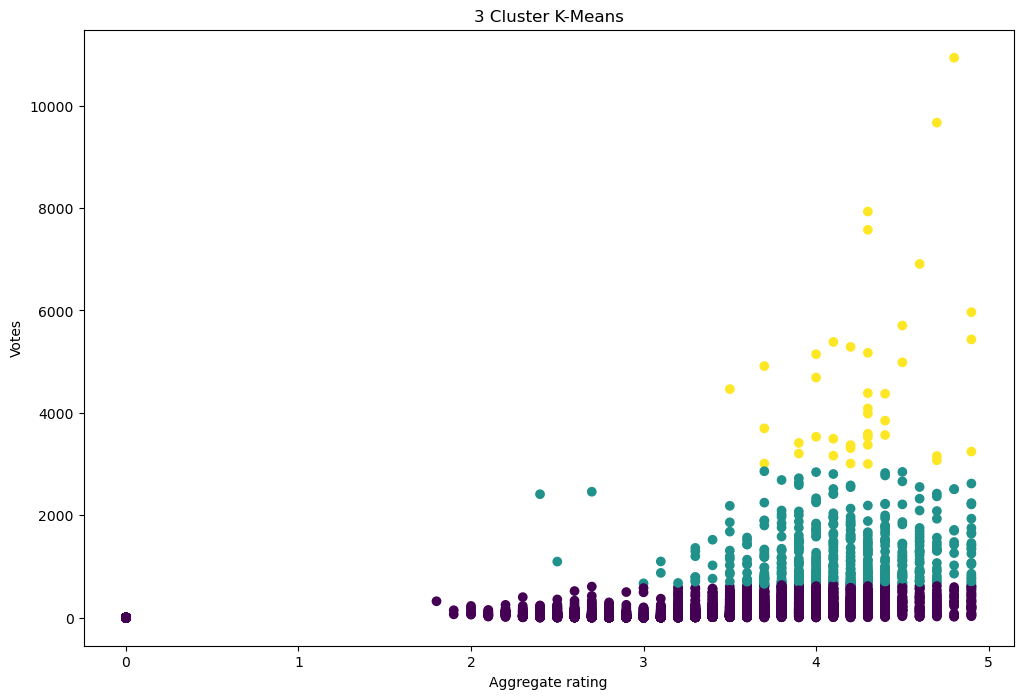

In [51]:
kmeans=KMeans(n_clusters=3)

kmeansoutput=kmeans.fit(Y1)

print(kmeansoutput)
pl.figure('3 Cluster K-Means')
pl.scatter(X1, Y1, c=kmeansoutput.labels_)
#pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Aggregate rating')
pl.ylabel('Votes')
pl.title('3 Cluster K-Means')
pl.show()

# Conclusion

1)The range of ratings for categories are as follows.

    A] 1.8 - 2.4: poor
    B] 2.5 - 3.4: Average
    C] 3.5 - 3.9: Good
    D] 4.0 - 4.4: Very Good
    E] 4.4 - 4.9: Excellent
    
2)The mean rating is 3.24 and 95% of the values lie between 2.15 and 4.34.


# Finding the relationship between different variables and Ratings.

we can use Data Analysis to check what features are useful to implement in a business to get maximum ratings.



let's start by converting some values into 1 and 0.

In [52]:
tt = {'Yes': 1, 'No': 0}
col = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for c in col:
    df.replace({c:tt}, inplace=True)

In [53]:
sumlist = df[col].sum()
sumlist

Has Table booking       1158
Has Online delivery     2451
Is delivering now         34
Switch to order menu       0
dtype: int64

Because Switch to order menu is empty we can just drop it.

In [54]:
sumlist.drop(['Switch to order menu'], inplace=True)

In [55]:
df.drop('Switch to order menu', axis = 1, inplace=True)
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

   Has Table booking  Has Online delivery  Is delivering now  Price range  \
0                  1                    0                  0            3   
1                  1                    0                  0            3   
2                  1                    0                  0            4   
3                  0                    0                  0            4   
4                  1                    0                  0            4   

   Aggregate rating Rating color Rating text  Votes  
0               4.8   Dark Green   Excellent    314  
1               4.5   Dark Green   Excellent    591  
2               4.4        Green   Very Good    270  
3               4.9   Dark Green   Excellent    365  
4               4.8   Dark Green   Excellent    229

In [56]:
dfrel = df[['Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range', 'Aggregate rating', 'Votes']]
dfrel

Average Cost for two  Has Table booking  Has Online delivery  \
0                     1100                  1                    0   
1                     1200                  1                    0   
2                     4000                  1                    0   
3                     1500                  0                    0   
4                     1500                  1                    0   
...                    ...                ...                  ...   
9546                    80                  0                    0   
9547                   105                  0                    0   
9548                   170                  0                    0   
9549                   120                  0                    0   
9550                    55                  0                    0   

      Is delivering now  Price range  Aggregate rating  Votes  
0                     0            3               4.8    314  
1                     0            3               4.5    591  
2                     0            4               4.4    270  
3                     0            4               4.9    365  
4                     0            4               4.8    229  
...                 ...          ...               ...    ...  
9546                  0            3               4.1    788  
9547                  0            3               4.2   1034  
9548                  0            4               3.7    661  
9549                  0            4               4.0    901  
9550                  0            2               4.0    591  

[9551 rows x 7 columns]

Now let's visualize what features are offered.

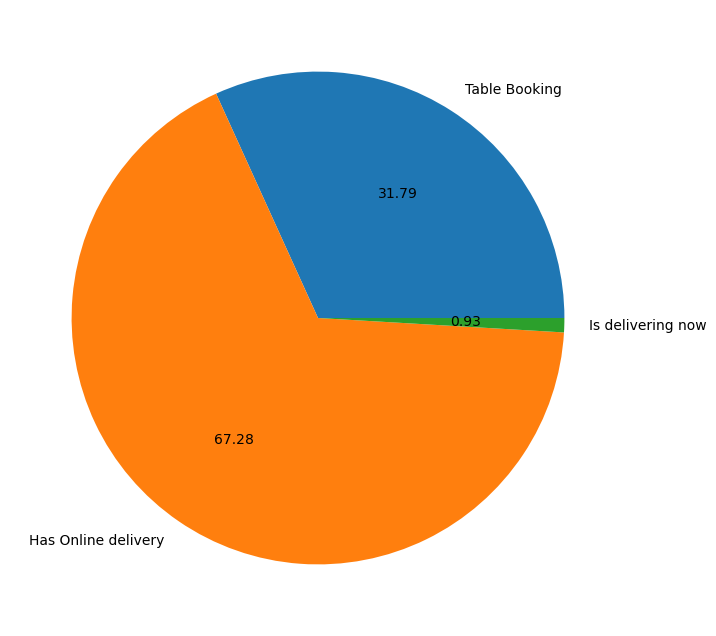

In [57]:
# pie plot to see distribution
plt.pie(sumlist, labels=['Table Booking', 'Has Online delivery', 'Is delivering now'],autopct='%1.2f')
plt.show()

In [58]:
dfwozeros = df[df['Aggregate rating'] != 0]

let's see if Online Delivery Affects rating.

<AxesSubplot:xlabel='Has Table booking', ylabel='Aggregate rating'>

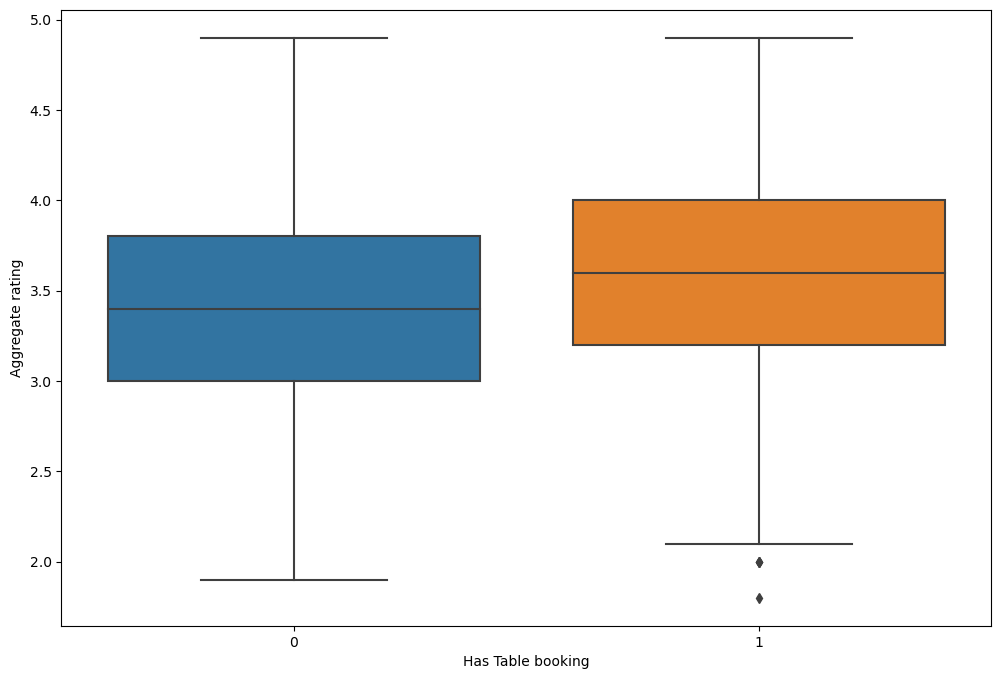

In [59]:
sns.boxplot(x=col[0], y='Aggregate rating', data=dfwozeros)

<AxesSubplot:xlabel='Has Online delivery', ylabel='Aggregate rating'>

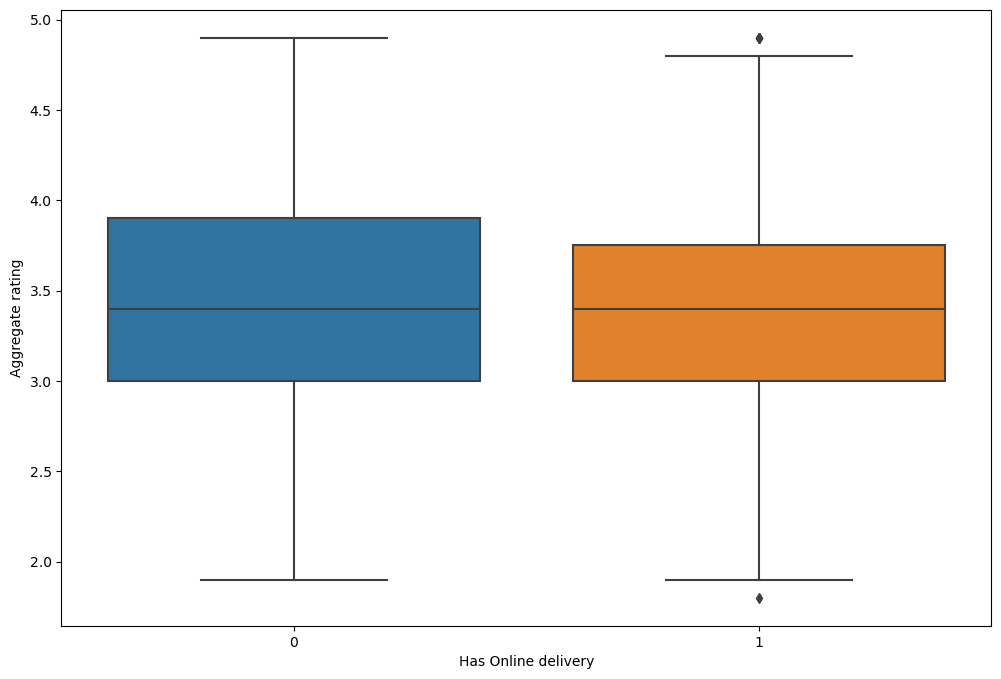

In [60]:
sns.boxplot(x=col[1], y='Aggregate rating', data=dfwozeros)

<AxesSubplot:xlabel='Has Online delivery', ylabel='Aggregate rating'>

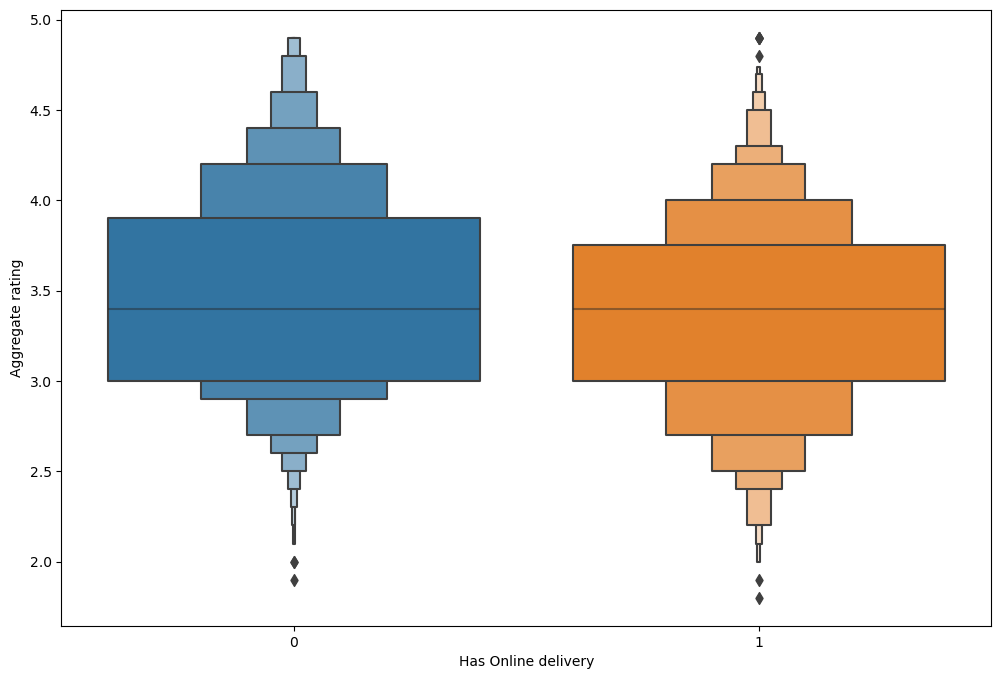

In [61]:
sns.boxenplot(x=col[1], y='Aggregate rating', data=dfwozeros)
# Boxenplot is used for better visualisation for data distribution

<AxesSubplot:xlabel='Is delivering now', ylabel='Aggregate rating'>

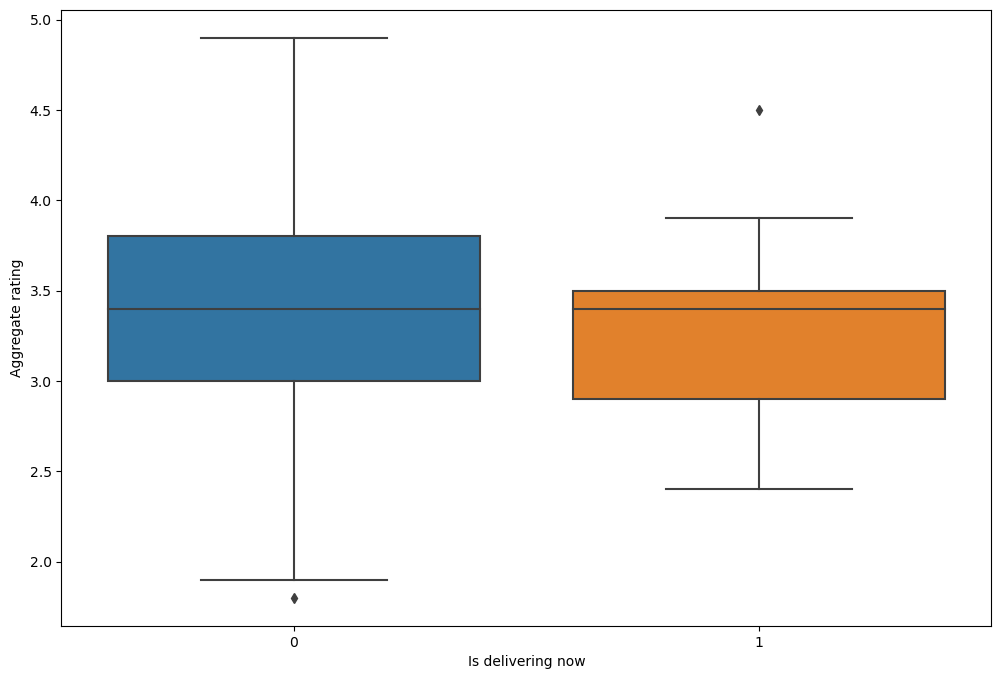

In [62]:
sns.boxplot(x=col[2], y='Aggregate rating', data=dfwozeros)

<AxesSubplot:xlabel='Is delivering now', ylabel='Aggregate rating'>

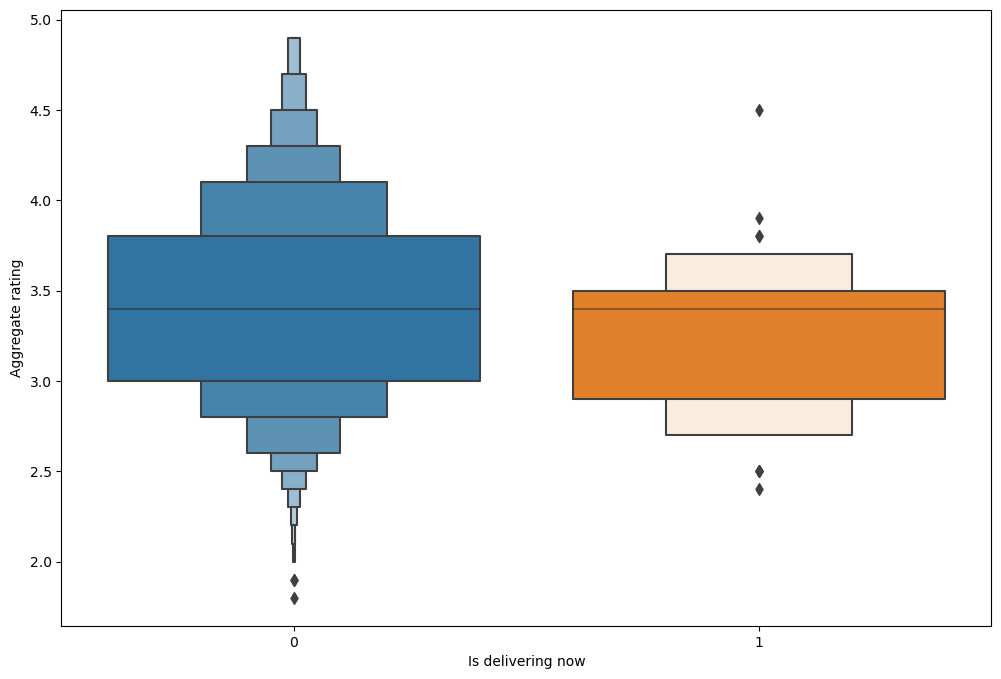

In [63]:
sns.boxenplot(x=col[2], y='Aggregate rating', data=dfwozeros)

# Conclusion

1) we can observe that online booking is a common features in restaurants

2) we can observe that these features don't provide any appreciable difference to the aggregate ratings.

3) Implementing these feature doesn't provide a appreciable difference to the rating of the restaurants but online booking is still a good idea to implement                                                           

# Let's compare with Price range.

Concentration of Price Range.

In [64]:
sumlist = dfwozeros['Price range'].value_counts()
sumlist

1    2744
2    2711
3    1373
4     575
Name: Price range, dtype: int64

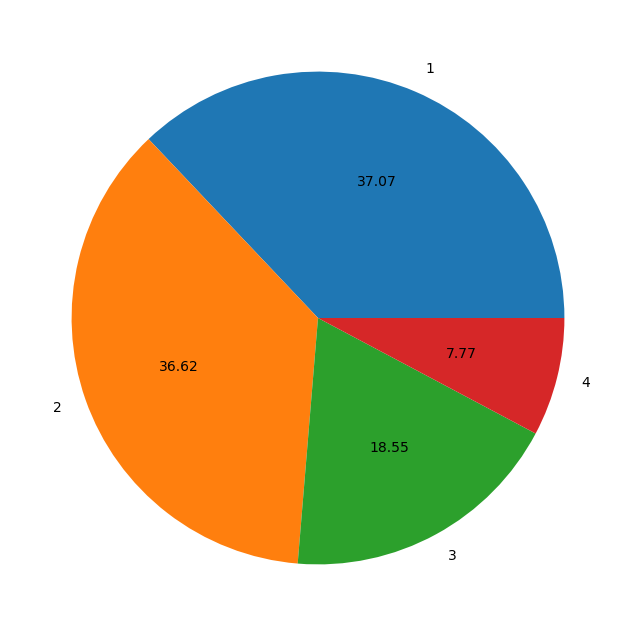

In [65]:
# pie plot for seeing distribution
plt.pie(sumlist, labels=[1, 2, 3, 4], autopct='%1.2f')
plt.show()

<AxesSubplot:xlabel='Price range', ylabel='Aggregate rating'>

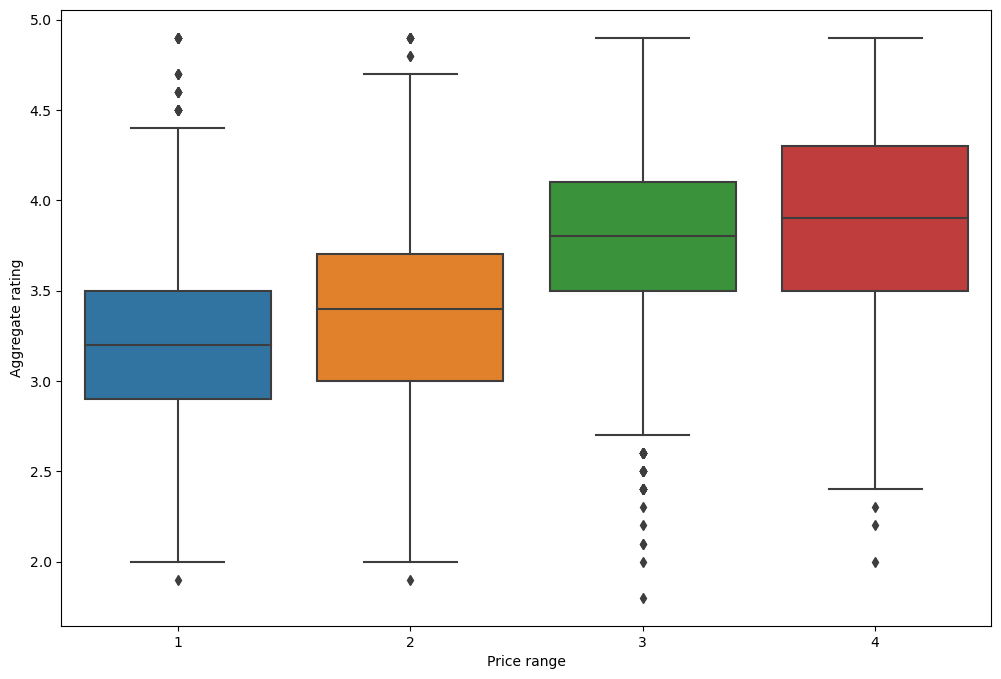

In [66]:
sns.boxplot(x='Price range', y='Aggregate rating', data=dfwozeros)

<AxesSubplot:xlabel='Price range', ylabel='Aggregate rating'>

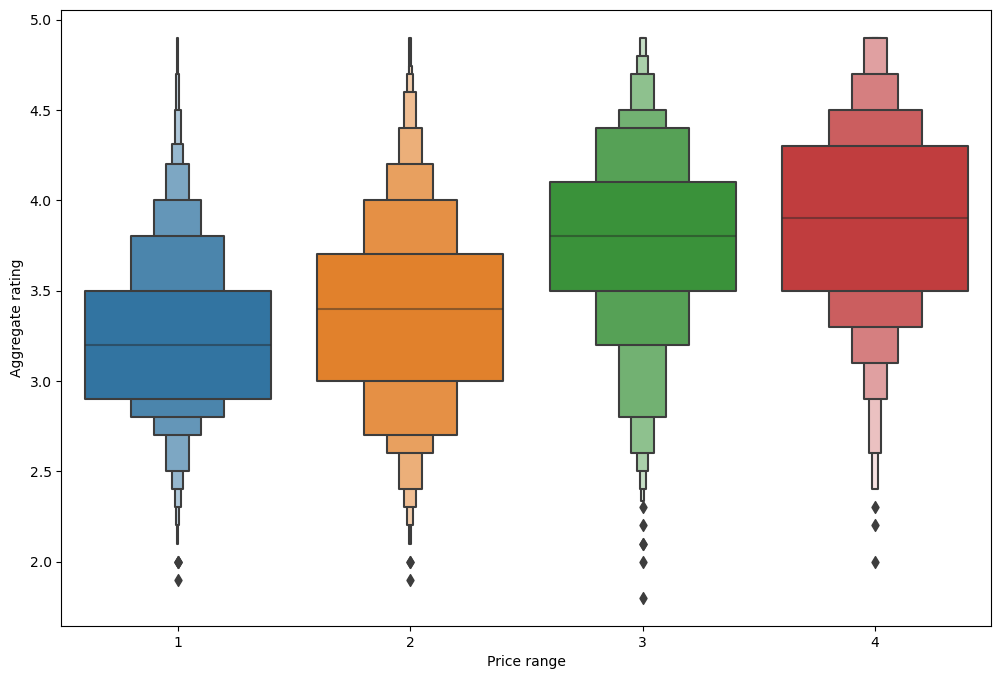

In [67]:
sns.boxenplot(x='Price range', y='Aggregate rating', data=dfwozeros)
## it show better distribution and outlier than box plot

In [68]:
X2=df[['Price range']]
Y2=df[['Votes']]


KMeans(n_clusters=3)


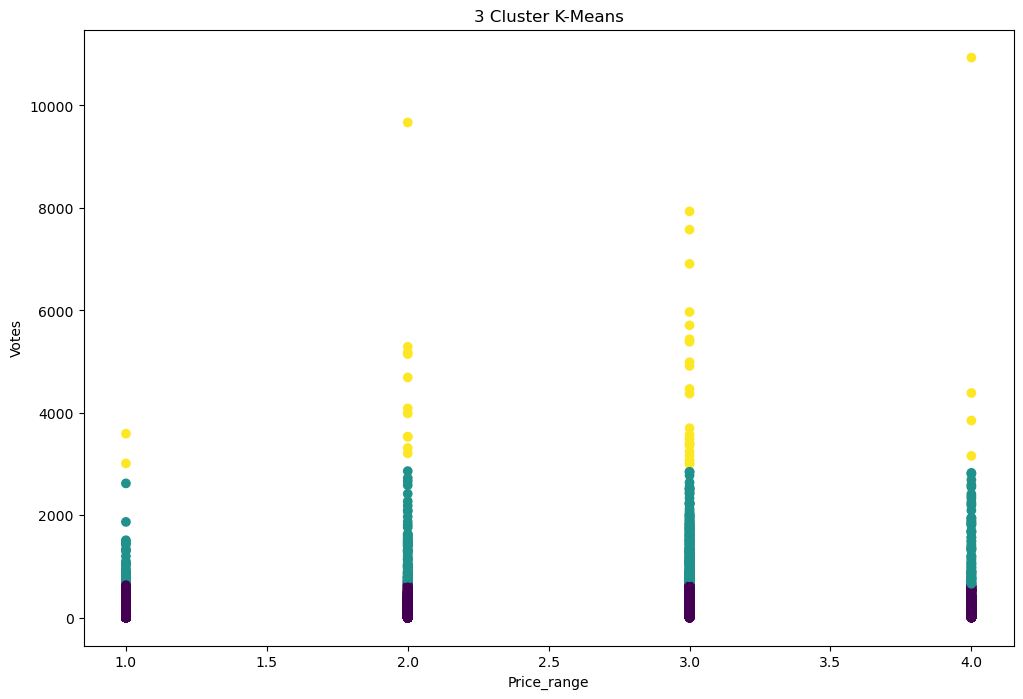

In [69]:
kmeans=KMeans(n_clusters=3)

kmeansoutput=kmeans.fit(Y2)

print(kmeansoutput)
pl.figure('3 Cluster K-Means')
pl.scatter(X2, Y2, c=kmeansoutput.labels_)
#pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Price_range')
pl.ylabel('Votes')
pl.title('3 Cluster K-Means')
pl.show()

In [70]:
X3=df[['Price range']]
Y3=df[['Aggregate rating']]


KMeans(n_clusters=3)


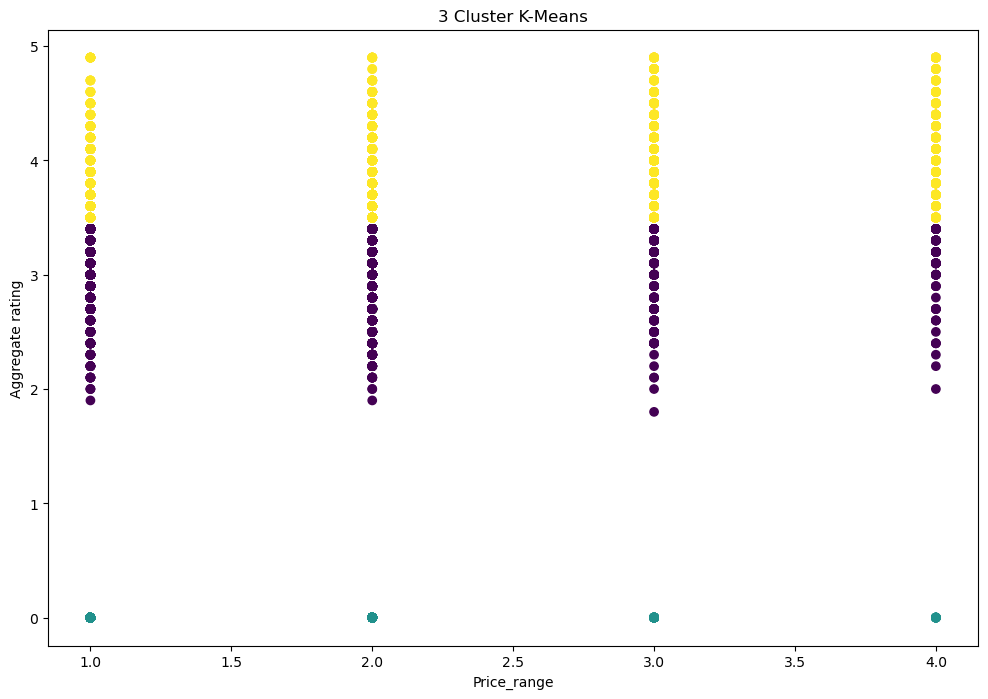

In [71]:
kmeans=KMeans(n_clusters=3)

kmeansoutput=kmeans.fit(Y3)

print(kmeansoutput)
pl.figure('3 Cluster K-Means')
pl.scatter(X3, Y3, c=kmeansoutput.labels_)
#pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Price_range')
pl.ylabel('Aggregate rating')
pl.title('3 Cluster K-Means')
pl.show()

# Conclusion
Price Rating 4 get's the highest average rating and there is an increase in ratings with an increase in Price range.

# One Country Analysis

As We know from above India has Most Order data.

so Let do Some Exploration  on that

In [72]:
# Creating One Country data set
one_selected_country_dataset = final_df[final_df['Country Code']==1]
one_selected_country_dataset.head()

Restaurant ID                        Restaurant Name  Country Code  City  \
624        3400025                             Jahanpanah             1  Agra   
625        3400341                    Rangrezz Restaurant             1  Agra   
626        3400005                Time2Eat - Mama Chicken             1  Agra   
627        3400021  Chokho Jeeman Marwari Jain Bhojanalya             1  Agra   
628        3400017                         Pinch Of Spice             1  Agra   

                                               Address     Locality  \
624  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
625  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   Agra Cantt   
626        Main Market, Sadar Bazaar, Agra Cantt, Agra   Agra Cantt   
627  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...  Civil Lines   
628  23/453, Opposite Sanjay Cinema, Wazipura Road,...  Civil Lines   

      Locality Verbose  Longitude   Latitude                        Cuisines  \
624   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
625   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
626   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
627  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
628  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

     ...  Has Table booking Has Online delivery Is delivering now  \
624  ...                 No                  No                No   
625  ...                 No                  No                No   
626  ...                 No                  No                No   
627  ...                 No                  No                No   
628  ...                 No                  No                No   

    Switch to order menu Price range Aggregate rating  Rating color  \
624                   No           3              3.9        Yellow   
625                   No           2              3.5        Yellow   
626                   No           2              3.6        Yellow   
627                   No           2              4.0         Green   
628                   No           3              4.2         Green   

     Rating text Votes Country  
624         Good   140   India  
625         Good    71   India  
626         Good    94   India  
627    Very Good    87   India  
628    Very Good   177   India  

[5 rows x 22 columns]

In [73]:
# Order count Locality vise


one_selected_country_dataset['Locality'].value_counts()

Connaught Place                        122
Rajouri Garden                          99
Shahdara                                87
Defence Colony                          86
Malviya Nagar                           85
                                      ... 
Mansingh Road                            1
12th Square Building, Banjara Hills      1
Gachibowli                               1
Holiday Inn Express & Suites             1
Waltair Uplands                          1
Name: Locality, Length: 784, dtype: int64

In [74]:
one_selected_country_dataset['Average Cost for two'].value_counts()

500     893
300     885
400     849
200     677
600     650
       ... 
260       1
7000      1
6500      1
720       1
2350      1
Name: Average Cost for two, Length: 79, dtype: int64

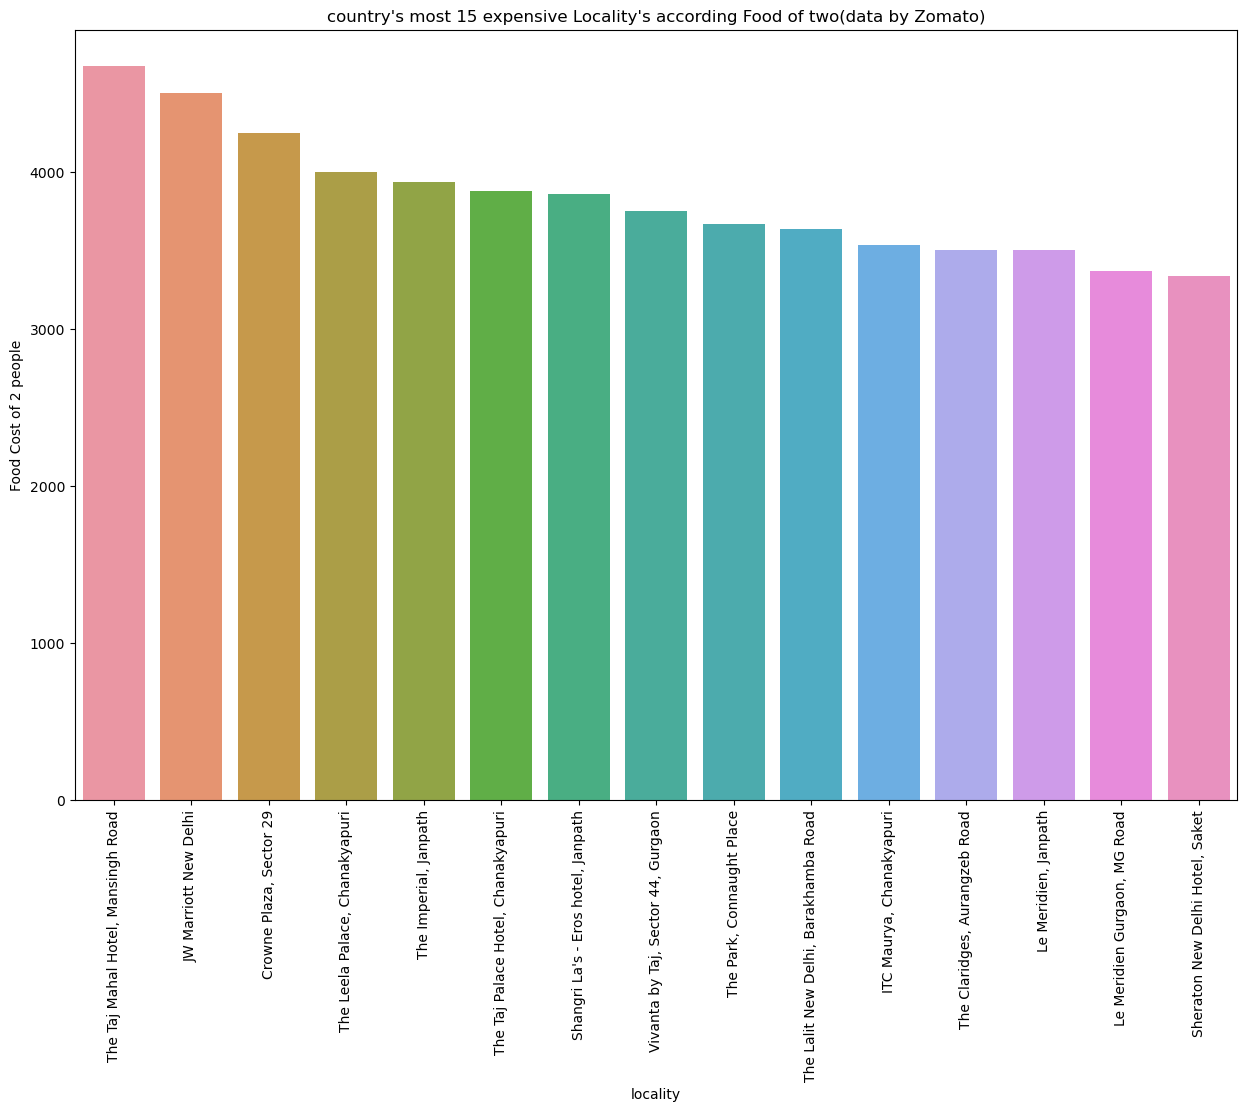

In [75]:
## For finding Most Expensive Locality

one_selected_country_dataset['Average Cost for two'] = one_selected_country_dataset['Average Cost for two'].astype(float)
locality_list = list(one_selected_country_dataset['Locality'].unique())
average_cost_of_2_by_locality=[]
for locality in locality_list:
    x = one_selected_country_dataset[one_selected_country_dataset['Locality']==locality]
    avg_cost = sum(x['Average Cost for two'])/len(x)
    average_cost_of_2_by_locality.append(avg_cost)
data = pd.DataFrame({'locality':locality_list,'Avg_food_cost_of_two':average_cost_of_2_by_locality})
new_index = (data['Avg_food_cost_of_two'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['locality'][:15],y=sorted_data['Avg_food_cost_of_two'][:15])
plt.xticks(rotation=90)
plt.xlabel("locality")
plt.ylabel("Food Cost of 2 people")
plt.title("country's most 15 expensive Locality's according Food of two(data by Zomato)")
plt.show()

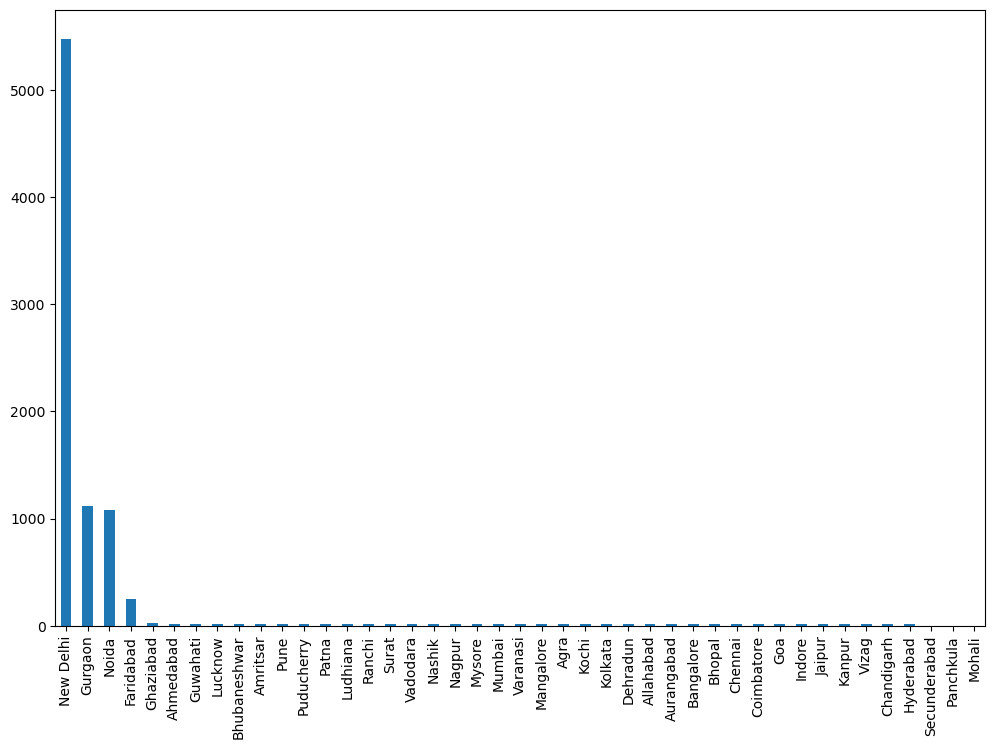

In [76]:
one_selected_country_dataset["City"].value_counts().plot(kind = 'bar')
plt.show()

# Conclusion
1) Most of the Order are from New Delhi City in India

2) Most Expensive Locality are also in New Delhi City


In [77]:
df1 = one_selected_country_dataset

# Effect of Average Cost on rating

In [78]:
X4=df1[['Average Cost for two']]
Y4=df1[['Aggregate rating']]

KMeans(n_clusters=3)


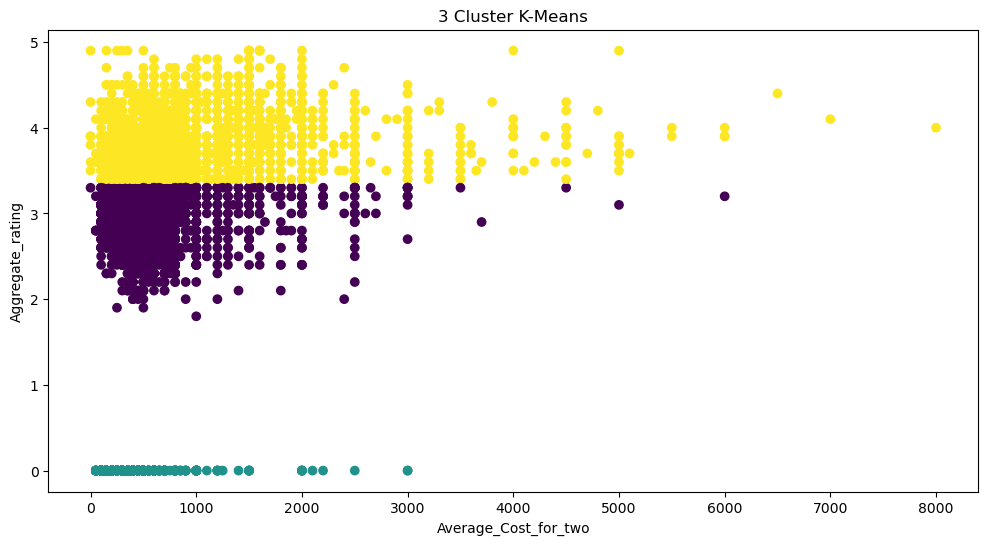

In [79]:
kmeans=KMeans(n_clusters=3)

kmeansoutput=kmeans.fit(Y4)

print(kmeansoutput)
plt.rcParams['figure.figsize'] = (12,6)
plt.figure('3 Cluster K-Means')
plt.scatter(X4, Y4, c=kmeansoutput.labels_)
#plt.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
plt.xlabel('Average_Cost_for_two')
plt.ylabel('Aggregate_rating')
plt.title('3 Cluster K-Means')
plt.show()

In [80]:
X5=df1[['Average Cost for two']]
Y5=df1[['Votes']]

KMeans(n_clusters=4)


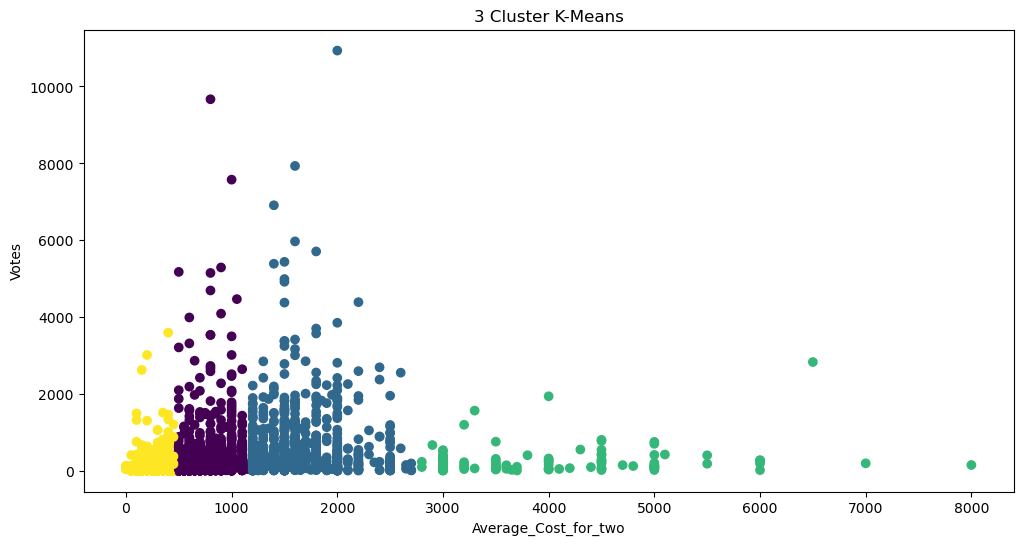

In [81]:
kmeans=KMeans(n_clusters=4)

kmeansoutput=kmeans.fit(X5)

print(kmeansoutput)
plt.figure('3 Cluster K-Means')
plt.scatter(X5, Y5, c=kmeansoutput.labels_)
#pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
plt.xlabel('Average_Cost_for_two')
plt.ylabel('Votes')
plt.title('3 Cluster K-Means')
plt.show()

# Conclusion
    1) The average does affect the rating but indirectly, as people prefer budget-friendly places.
    2) As price increases, orders are fewer and votes are fewer, but the rating is higher.
    3) So we can assume that price is thus affecting the rating.

## Recommandation And Map Plotting.

First Change the data for processing

In [107]:
## Drop Unneccessery Columns
zomato=one_selected_country_dataset.drop(['Country Code','Currency','Address', 'Votes'],axis=1)

In [108]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)


In [109]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)

In [110]:
#Changing the column names
zomato = zomato.rename(columns={'Average Cost for two':'cost'})

In [111]:
zomato['Restaurant'] =zomato['Restaurant Name']
zomato.head()

Restaurant ID                        Restaurant Name  City     Locality  \
624        3400025                             Jahanpanah  Agra   Agra Cantt   
625        3400341                    Rangrezz Restaurant  Agra   Agra Cantt   
626        3400005                Time2Eat - Mama Chicken  Agra   Agra Cantt   
627        3400021  Chokho Jeeman Marwari Jain Bhojanalya  Agra  Civil Lines   
628        3400017                         Pinch Of Spice  Agra  Civil Lines   

      Locality Verbose  Longitude   Latitude                        Cuisines  \
624   Agra Cantt, Agra  78.011544  27.161661           North Indian, Mughlai   
625   Agra Cantt, Agra   0.000000   0.000000           North Indian, Mughlai   
626   Agra Cantt, Agra  78.011608  27.160832                    North Indian   
627  Civil Lines, Agra  77.998092  27.195928                      Rajasthani   
628  Civil Lines, Agra  78.007553  27.201725  North Indian, Chinese, Mughlai   

       cost Has Table booking Has Online delivery Is delivering now  \
624   850.0                No                  No                No   
625   700.0                No                  No                No   
626   500.0                No                  No                No   
627   400.0                No                  No                No   
628  1000.0                No                  No                No   

    Switch to order menu  Price range  Aggregate rating Rating color  \
624                   No            3               3.9       Yellow   
625                   No            2               3.5       Yellow   
626                   No            2               3.6       Yellow   
627                   No            2               4.0        Green   
628                   No            3               4.2        Green   

    Rating text Country                             Restaurant  
624        Good   India                             Jahanpanah  
625        Good   India                    Rangrezz Restaurant  
626        Good   India                Time2Eat - Mama Chicken  
627   Very Good   India  Chokho Jeeman Marwari Jain Bhojanalya  
628   Very Good   India                         Pinch Of Spice

In [112]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float)

In [113]:
zomato['Aggregate rating'] = zomato['Aggregate rating'].astype('float')


In [114]:
# Adjust the column names
zomato['Restaurant Name'] = zomato['Restaurant Name'].apply(lambda x:x.title())
zomato['Has Online delivery'].replace(('Yes','No'),(True, False),inplace=True)
zomato['Has Table booking'].replace(('Yes','No'),(True, False),inplace=True)

In [115]:
## Computing Mean Rating
restaurants = list(zomato['Restaurant Name'].unique())
zomato['Mean Rating'] = 0


As there are many restaurant without rated so we are giving mean rating to those.

In [116]:
for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['Restaurant Name'] == restaurants[i]] = zomato['Aggregate rating'][zomato['Restaurant Name'] == restaurants[i]].mean()

In [117]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [118]:
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

In [119]:
zomato[['Rating text', 'Cuisines']].sample(5)

Rating text               Cuisines
3825   Very Good          Thai, Chinese
5462        Good               Desserts
8274   Not rated     Chinese, Fast Food
4828     Average  Chinese, North Indian
3928     Average       Bakery, Desserts

In [120]:
# RESTAURANT NAMES:
restaurant_names = list(zomato['Restaurant Name'].unique())
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_nu_of_words]

## 

In [121]:
# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)

In [122]:
## Install neccessery libaries

In [123]:
#pip install geopy
#pip install folium

In [124]:
# Import Libaries

In [125]:
import re
from nltk.corpus import stopwords
import pylab as pl
#To geolocate a query to an address and coordinates:
from geopy.geocoders import ArcGIS
import folium
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel


In [126]:
df_percent.set_index('Restaurant Name', inplace=True)
indices = pd.Series(df_percent.index)

# Creating tf-idf matrix to Performs the TF-IDF transformation from a provided matrix of counts.
#TFIDF works by proportionally increasing the number of times a word appears in the document
#but is counterbalanced by the number of documents in which it is present.

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['Rating text'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

## 

# Function For Recommandation and Plotting recommanded Restaurant on Map.

In [127]:
#geloc = ArcGIS()
#locat = geloc.geocode('Pune')

In [128]:
zm_list = []
df_new=[]
hotels = folium.Map(location=[20.5937,78.9629],zoom_start=5)
gemaps = folium.FeatureGroup(name='Restaurants')
def recommend(name,city, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top restaurant indexes with a similar cosine-sim value
    top_indexes = list(score_series.iloc[0:200].index)
    
    # Names of the top restaurants
    for each in top_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['Restaurant','City','Cuisines', 'Mean Rating','Longitude','Latitude', 'Rating text','cost'])
    
    # Create the top similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['Restaurant','City','Cuisines','Mean Rating','Longitude','Latitude',
                                                        'Rating text','cost' ]][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['Restaurant','City','Cuisines','Mean Rating','Longitude','Latitude',
                                            'Rating text','cost'], keep=False)
    df_new = df_new[df_new['City']==city]
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    #create a list based on recommation hotels for showing on map
    zm_list=df_new[['Restaurant','City',
                    'Latitude','Longitude','Cuisines',
                    'Mean Rating','Rating text','cost']].values.tolist()
    
    # in for loop pass the created list for map
    for i in zm_list:
        if i[1]==city:
            #calling map marker for marking location on map
            #for showing restaurant on map pass its map co-ordinates into the location
            gemaps.add_child(folium.Marker(location=[i[2],i[3]],
            #use tooltip to popup or show details realated to marker
                                           tooltip = '<h5><b>'+str(i[0])+"</b></h5><br/>"+str(i[1])+'<br/>'+str(i[4])+
                                                   '<br/>Rating: <b>'+str(i[5])+'/5</b><br/>'+str(i[6])+
                                                   '<br/>Cost for 2: '+str(i[7]),
            #icon use to show pointing the restaurant on map
                                           icon=folium.Icon(color='green')))
        
    #hotels.add_child(gemaps)
    return df_new
#recommend('Jahanpanah','New Delhi') Example for applying Function
#df_new
#hotels.add_child(gemaps) For Displaying Map
#hotels.save('map.html') For Saving Map

In [129]:
def City():
    print("Which Type of Hotels You Like")
    city = input('Enter Your City Name : ')
    # store restaurant name and city name
    zc=zomato[['Restaurant Name','City']][zomato['City']==city]
    print(zc.head(30))
    hotel_name = input("Check list and Enter Type Of Hotels You Like : ")
    
    recommend(hotel_name,city)
    #hotels.add_child(gemaps)
    return hotel_name,city

In [130]:
# calling city function
City()

# Disaplay map
hotels.add_child(gemaps)

Which Type of Hotels You Like
Enter Your City Name : New Delhi
                 Restaurant Name       City
2560                  Food Cloud  New Delhi
2561                   Burger.In  New Delhi
2562             Days Of The Raj  New Delhi
2563              Dilli Ka Dhaba  New Delhi
2564                   Govardhan  New Delhi
2565              Mezbaan Grills  New Delhi
2566                  Say Cheese  New Delhi
2567                      Southy  New Delhi
2568                     Monosoz  New Delhi
2569                       Waves  New Delhi
2570                Delhi Darbar  New Delhi
2571                     Chateau  New Delhi
2572                Nariyal Cafe  New Delhi
2573        Rustom'S Parsi Bhonu  New Delhi
2574                    Barshala  New Delhi
2575                  Chawla'Sœ_  New Delhi
2576              Domino'S Pizza  New Delhi
2577                    Sultanat  New Delhi
2578                Bella Italia  New Delhi
2579             Clever Fox Cafe  New Delhi
2580         

##  Conclusion
    1) In this way, we recommended the restaurant based on the liking of the customer and which city they are.
    2) Recommended restaurants can be viewed on the map.

#                                                    Thank You